# Breast Cancer Prediction Using Machine-Learning Models

##### Objective 
This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this i have used machine learning classification methods to fit a function that can predict the discrete class of new input.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
report = pd.read_csv("breast cancer.csv")

In [4]:
report.sample(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
126,866083,M,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.03085,...,35.64,113.20,848.7,0.1471,0.2884,0.3796,0.13290,0.3470,0.07900,NaN
433,908445,M,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,NaN
48,857155,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,...,20.70,89.88,582.6,0.1494,0.2156,0.3050,0.06548,0.2747,0.08301,NaN
200,877501,B,12.230,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,...,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.10800,0.2668,0.08174,NaN
103,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,...,26.83,72.22,361.2,0.1559,0.2302,0.2644,0.09749,0.2622,0.08490,NaN
338,897880,B,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,...,26.84,71.98,384.0,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664,NaN
483,912558,B,13.700,17.64,87.76,571.1,0.09950,0.07957,0.04548,0.03160,...,23.53,95.78,686.5,0.1199,0.1346,0.1742,0.09077,0.2518,0.06960,NaN
318,894329,B,9.042,18.90,60.07,244.5,0.09968,0.19720,0.19750,0.04908,...,23.40,68.62,297.1,0.1221,0.3748,0.4609,0.11450,0.3135,0.10550,NaN
351,899667,M,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,...,24.17,119.40,915.3,0.1550,0.5046,0.6872,0.21350,0.4245,0.10500,NaN
162,871201,M,19.590,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,...,26.39,174.90,2232.0,0.1438,0.3846,0.6810,0.22470,0.3643,0.09223,NaN


In [5]:
report.shape

(569, 33)

## Preparing the data

In [6]:
report = report.drop("Unnamed: 32", axis=1)   # dropping the unwanted feature for prediction

In [7]:
report.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
report.drop('id', axis =1,inplace=True)
                                                #dropping the unwanted feature for prediction

In [9]:
report.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## 
‘Diagnosis’ is the column which we are going to predict , which says if the cancer is M = malignant or B = benign.

In [11]:
report = report.rename(columns = {"diagnosis" : "target"})   # renaming the title of properties as per need of prediction

In [12]:
report.sample(10)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
409,B,12.270,17.92,78.41,466.1,0.08685,0.06526,0.03211,0.02653,0.1966,...,14.10,28.88,89.00,610.2,0.12400,0.17950,0.13770,0.09532,0.3455,0.06896
270,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,...,14.91,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
130,B,12.190,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,...,13.34,17.81,91.38,545.2,0.14270,0.25850,0.09915,0.08187,0.3469,0.09241
31,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,...,16.82,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
340,B,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,...,16.67,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764
356,B,13.050,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.05603,0.2035,...,14.19,24.85,94.22,591.2,0.13430,0.26580,0.25730,0.12580,0.3113,0.08317
301,B,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,...,13.46,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764
111,B,12.630,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,0.1735,...,13.33,25.47,89.00,527.4,0.12870,0.22500,0.22160,0.11050,0.2226,0.08486
48,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,...,13.76,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,...,7.93,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382


In [13]:
report.columns

Index(['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
c = list(report.columns)
print(c)

['target', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


## Variable/Attribute Description
 Target--> (M= malignant , B = Benign)

## Ten real-valued features are computed for each cell nucleus:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)


The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [15]:
features_mean = c[1:11]
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [16]:
features_se = c[11:21]

features_worst = c[21:]

In [17]:
report['target'].unique()

array(['M', 'B'], dtype=object)

In [18]:
import warnings 
warnings.filterwarnings('ignore')

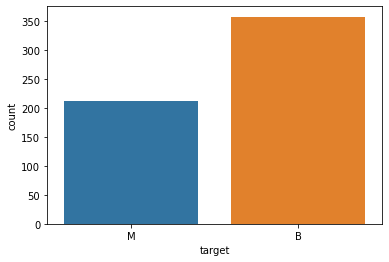

In [19]:
sns.countplot(report['target'],label="count");


In [20]:
report['target'].value_counts()

B    357
M    212
Name: target, dtype: int64

#
1 means the cancer is malignant and 0 means benign. We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant)

In [21]:
report['target']= report['target'].map({'M':1, 'B':0})   

In [22]:
report.describe()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Exploration 

In [23]:
corr = report.corr() 
corr

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

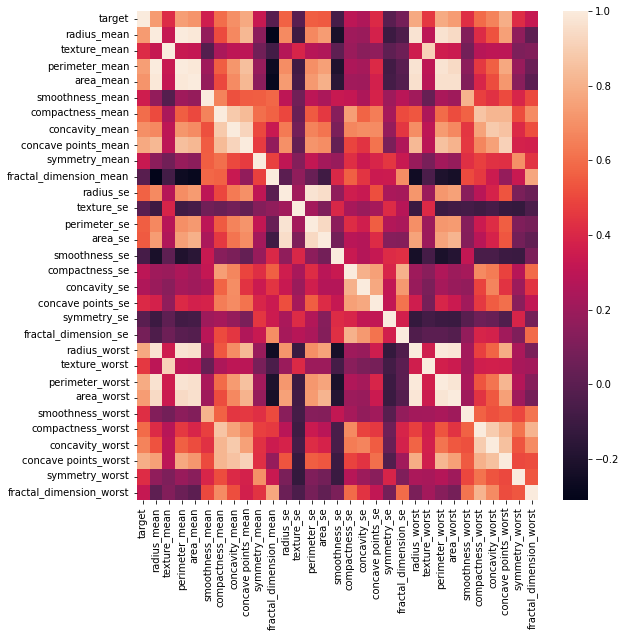

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(corr)

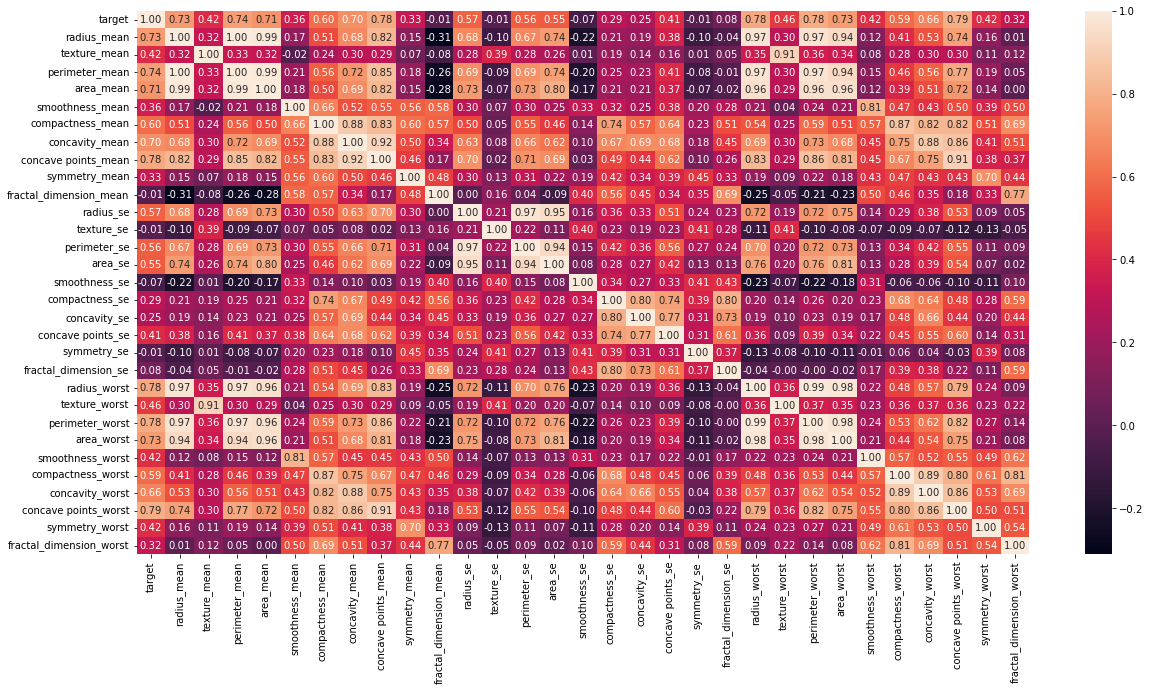

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot= True, fmt =".2f")
plt.show()

In [26]:
np.abs(corr["target"])>0.75

target                      True
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst                True
texture_worst              False
perimeter_worst             True
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst        True
symmetry_worst             False
fractal_di

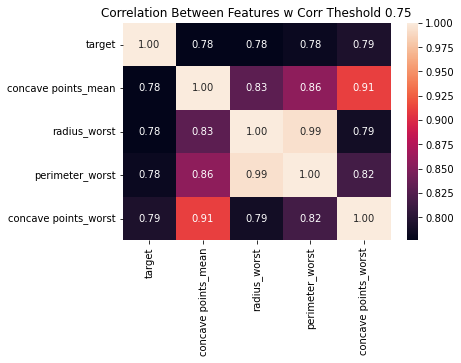

In [27]:
threshold = 0.75
filterr = np.abs(corr["target"]) > threshold
corr_features = corr.columns[filterr].tolist()
sns.heatmap(report[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

In [28]:
report[corr_features]

,target,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,1,0.14710,25.380,184.60,0.2654
1,1,0.07017,24.990,158.80,0.1860
2,1,0.12790,23.570,152.50,0.2430
3,1,0.10520,14.910,98.87,0.2575
4,1,0.10430,22.540,152.20,0.1625
...,...,...,...,...,...
564,1,0.13890,25.450,166.10,0.2216
565,1,0.09791,23.690,155.00,0.1628
566,1,0.05302,18.980,126.70,0.1418
567,1,0.15200,25.740,184.60,0.2650


In [29]:
report[corr_features].corr()

,target,concave points_mean,radius_worst,perimeter_worst,concave points_worst
target,1.000000,0.776614,0.776454,0.782914,0.793566
concave points_mean,0.776614,1.000000,0.830318,0.855923,0.910155
radius_worst,0.776454,0.830318,1.000000,0.993708,0.787424
perimeter_worst,0.782914,0.855923,0.993708,1.000000,0.816322
concave points_worst,0.793566,0.910155,0.787424,0.816322,1.000000


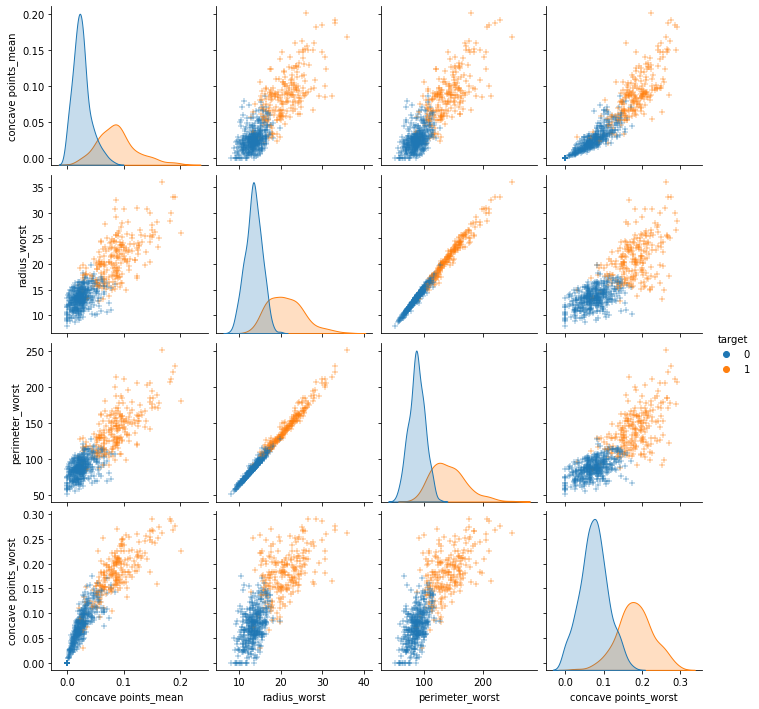

In [30]:
sns.pairplot(report[corr_features], diag_kind = "kde", markers = "+", hue = "target")
plt.show()

In [31]:
x = report.drop('target',axis=1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
y = report['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [33]:
columns = x.columns.tolist()

## Splitting the Data

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [35]:
x_train.shape

(398, 30)

In [36]:
x_test.shape

(171, 30)

In [37]:
y_train.shape

(398,)

In [38]:
y_test.shape

(171,)

## Feature scaling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


In [41]:
x_train

array([[ 0.24321246, -0.63633466,  0.30720754, ...,  1.34577274,
         1.09948531,  1.31371381],
       [ 0.20664213,  1.38336573,  0.14615569, ..., -0.04658526,
        -0.28078463, -0.8135492 ],
       [-0.26877211, -0.0269622 , -0.3480364 , ..., -1.51647908,
        -0.73341082, -1.19765435],
       ...,
       [ 0.38386756,  0.76937681,  0.37097426, ...,  0.5226083 ,
        -0.54628268, -0.88726053],
       [-1.44239827, -0.90870569, -1.40550118, ..., -0.97103927,
        -0.74140774, -0.54001104],
       [-0.40661411, -0.0823597 , -0.37624091, ..., -0.29831522,
        -1.2420155 , -0.6799474 ]])

In [42]:
x_train[0]

array([ 2.43212460e-01, -6.36334664e-01,  3.07207537e-01,  1.06517283e-01,
        1.38504157e+00,  1.16947717e+00,  1.01103248e+00,  1.04986767e+00,
        1.21589130e+00,  6.47751892e-01,  8.25490447e-02, -5.20845079e-01,
        6.99135876e-02,  3.37744136e-02, -9.32238655e-02,  2.98543299e-04,
       -6.71647296e-02,  1.42283190e-01, -5.63891305e-01, -1.24734946e-03,
        5.40619687e-01,  2.53790372e-01,  6.02011790e-01,  3.81473391e-01,
        2.39487331e+00,  1.33982913e+00,  9.63749531e-01,  1.34577274e+00,
        1.09948531e+00,  1.31371381e+00])

In [43]:
x_train_df = pd.DataFrame(x_train, columns = columns)
x_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.243212,-0.636335,0.307208,0.106517,1.385042,1.169477,1.011032,1.049868,1.215891,0.647752,...,0.540620,0.253790,0.602012,0.381473,2.394873,1.339829,0.963750,1.345773,1.099485,1.313714
1,0.206642,1.383366,0.146156,0.066967,-0.961527,-0.596031,-0.586893,-0.462838,0.071187,-0.837033,...,0.074018,1.053987,0.027632,-0.077589,-1.161791,-0.740037,-0.503731,-0.046585,-0.280785,-0.813549
2,-0.268772,-0.026962,-0.348036,-0.335367,-1.112353,-1.247915,-1.090910,-1.132549,-0.004645,-1.081312,...,-0.388526,-0.578935,-0.472691,-0.423339,-1.331363,-1.247206,-1.259319,-1.516479,-0.733411,-1.197654
3,-0.243454,0.303115,-0.210284,-0.307767,-0.680921,0.103625,0.255468,-0.338917,-0.932687,-0.373037,...,-0.272890,-0.056855,-0.161884,-0.312248,0.103477,0.716003,0.868859,0.081894,-0.535087,-0.112140
4,1.630072,0.492389,1.576819,1.664352,-0.184248,0.516642,0.489006,0.990345,0.988395,-0.972137,...,1.944482,0.460345,1.861566,1.943586,0.112173,0.505604,0.448020,1.036526,0.275802,-0.065494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.507886,-0.973336,-0.536066,-0.532551,-0.682324,-0.723363,-0.850529,-0.805352,-0.658246,-0.224286,...,-0.485904,-0.720433,-0.447325,-0.493412,-0.309583,-0.370164,-0.714388,-0.852420,-0.378347,-0.234800
394,1.627259,1.314119,1.605433,1.556228,0.353814,1.055279,2.078814,1.708469,1.378389,-0.246121,...,1.315584,1.263795,1.231789,1.225766,-0.226971,0.925062,1.423494,0.905059,0.651657,0.055438
395,0.383868,0.769377,0.370974,0.236550,-0.312626,0.002749,0.301676,0.680415,-0.372973,-0.267956,...,0.057788,0.004949,0.030547,-0.069899,-0.305235,-0.323930,0.082218,0.522608,-0.546283,-0.887261
396,-1.442398,-0.908706,-1.405501,-1.149709,-0.948900,-0.503911,-0.509963,-0.628579,0.396182,0.447142,...,-1.250522,-1.318954,-1.200725,-0.973839,-1.357451,-0.825805,-0.820143,-0.971039,-0.741408,-0.540011


In [44]:
x_train_df_describe = x_train_df.describe()
x_train_df_describe

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,1.729493e-17,-4.811896e-16,-3.004297e-16,-2.340395e-16,1.603965e-16,-5.812849e-17,1.902442e-16,-7.179489e-17,-1.694903e-15,-1.736467e-17,...,3.185615e-16,3.849517e-16,-3.068456e-18,1.645808e-17,1.071170e-16,6.360072e-17,-1.421950e-16,3.612409e-17,2.014023e-16,-5.559484e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.776313e+00,-2.088211e+00,-1.766028e+00,-1.350592e+00,-3.074491e+00,-1.600217e+00,-1.099553e+00,-1.239459e+00,-2.745436e+00,-1.732270e+00,...,-1.514862e+00,-2.166317e+00,-1.515030e+00,-1.107832e+00,-2.676200e+00,-1.479180e+00,-1.268073e+00,-1.682457e+00,-2.131274e+00,-1.649712e+00
25%,-6.914407e-01,-7.165456e-01,-6.885343e-01,-6.783754e-01,-7.398484e-01,-7.699938e-01,-7.610472e-01,-7.415953e-01,-7.259537e-01,-7.189867e-01,...,-6.700086e-01,-7.265319e-01,-6.681842e-01,-6.224062e-01,-6.476402e-01,-7.204379e-01,-7.492597e-01,-7.357427e-01,-6.186549e-01,-7.216980e-01
50%,-2.054773e-01,-1.019796e-01,-2.102839e-01,-2.811631e-01,-3.973608e-02,-2.136569e-01,-3.051484e-01,-3.756057e-01,-7.144990e-02,-1.505927e-01,...,-2.373878e-01,-5.522868e-02,-2.562051e-01,-3.166064e-01,-5.522507e-02,-2.860715e-01,-2.591507e-01,-2.481186e-01,-1.616304e-01,-2.039910e-01
75%,4.239543e-01,5.570197e-01,4.956464e-01,2.783771e-01,6.256512e-01,5.128359e-01,5.439563e-01,5.712462e-01,5.496516e-01,4.450952e-01,...,4.163617e-01,6.542953e-01,4.963201e-01,2.601277e-01,5.567560e-01,5.863466e-01,5.310492e-01,7.272789e-01,3.969551e-01,4.709284e-01
max,3.773655e+00,4.582571e+00,3.914932e+00,5.280805e+00,4.696194e+00,4.604948e+00,4.225616e+00,3.578826e+00,4.404453e+00,4.709074e+00,...,4.036074e+00,3.859555e+00,4.220314e+00,5.780504e+00,3.907978e+00,4.587610e+00,4.672067e+00,2.664927e+00,5.982410e+00,5.143248e+00


In [45]:
x_train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.243212,-0.636335,0.307208,0.106517,1.385042,1.169477,1.011032,1.049868,1.215891,0.647752,...,0.540620,0.253790,0.602012,0.381473,2.394873,1.339829,0.963750,1.345773,1.099485,1.313714
1,0.206642,1.383366,0.146156,0.066967,-0.961527,-0.596031,-0.586893,-0.462838,0.071187,-0.837033,...,0.074018,1.053987,0.027632,-0.077589,-1.161791,-0.740037,-0.503731,-0.046585,-0.280785,-0.813549
2,-0.268772,-0.026962,-0.348036,-0.335367,-1.112353,-1.247915,-1.090910,-1.132549,-0.004645,-1.081312,...,-0.388526,-0.578935,-0.472691,-0.423339,-1.331363,-1.247206,-1.259319,-1.516479,-0.733411,-1.197654
3,-0.243454,0.303115,-0.210284,-0.307767,-0.680921,0.103625,0.255468,-0.338917,-0.932687,-0.373037,...,-0.272890,-0.056855,-0.161884,-0.312248,0.103477,0.716003,0.868859,0.081894,-0.535087,-0.112140
4,1.630072,0.492389,1.576819,1.664352,-0.184248,0.516642,0.489006,0.990345,0.988395,-0.972137,...,1.944482,0.460345,1.861566,1.943586,0.112173,0.505604,0.448020,1.036526,0.275802,-0.065494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.507886,-0.973336,-0.536066,-0.532551,-0.682324,-0.723363,-0.850529,-0.805352,-0.658246,-0.224286,...,-0.485904,-0.720433,-0.447325,-0.493412,-0.309583,-0.370164,-0.714388,-0.852420,-0.378347,-0.234800
394,1.627259,1.314119,1.605433,1.556228,0.353814,1.055279,2.078814,1.708469,1.378389,-0.246121,...,1.315584,1.263795,1.231789,1.225766,-0.226971,0.925062,1.423494,0.905059,0.651657,0.055438
395,0.383868,0.769377,0.370974,0.236550,-0.312626,0.002749,0.301676,0.680415,-0.372973,-0.267956,...,0.057788,0.004949,0.030547,-0.069899,-0.305235,-0.323930,0.082218,0.522608,-0.546283,-0.887261
396,-1.442398,-0.908706,-1.405501,-1.149709,-0.948900,-0.503911,-0.509963,-0.628579,0.396182,0.447142,...,-1.250522,-1.318954,-1.200725,-0.973839,-1.357451,-0.825805,-0.820143,-0.971039,-0.741408,-0.540011


In [46]:
x_train_df["target"] = y_train

In [47]:
y_train

117    1
542    0
58     0
466    0
218    1
      ..
324    0
129    1
91     1
358    0
355    0
Name: target, Length: 398, dtype: int64

# Machine Learning Models Selection

## 1. Logistic Regression Model

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [50]:
y_pred = lr.predict(x_test)

In [51]:
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

In [52]:
y_test

495    0
342    0
277    1
126    1
134    1
      ..
81     0
281    0
42     1
109    0
433    1
Name: target, Length: 171, dtype: int64

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9590643274853801


In [54]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.9590643274853801


In [55]:
results = pd.DataFrame()
results

""


In [56]:
tempresults = pd.DataFrame({'Algorithm': ['logistic Regression Method'], 'Accuracy':[lr_acc]})

In [57]:
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.959064


## 2. Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred = dtc.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [60]:
print(accuracy_score(y_test, y_pred))

0.9122807017543859


In [61]:
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.9122807017543859


In [62]:
tempresults = pd.DataFrame({'Algorithm': ['Decision Tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.959064
0,Decision Tree Classifier Method,0.912281


## 3. Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [64]:
y_pred = rfc.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [65]:
accuracy_score(y_test, y_pred)

0.9532163742690059

In [66]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc)

0.9532163742690059


In [67]:
tempresults = pd.DataFrame({'Algorithm': ['Random forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
0,logistic Regression Method,0.959064
0,Decision Tree Classifier Method,0.912281
0,Random forest Classifier Method,0.953216


## 4. Support Vector Machine Classifier

In [68]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)

SVC()

In [69]:
y_pred = svc.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [70]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [71]:
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.9649122807017544


In [72]:
tempresults = pd.DataFrame({'Algorithm': ['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results,tempresults])
results = results[['Algorithm', 'Accuracy']]
results


,Algorithm,Accuracy
0,logistic Regression Method,0.959064
0,Decision Tree Classifier Method,0.912281
0,Random forest Classifier Method,0.953216
0,Support Vector Classifier Method,0.964912


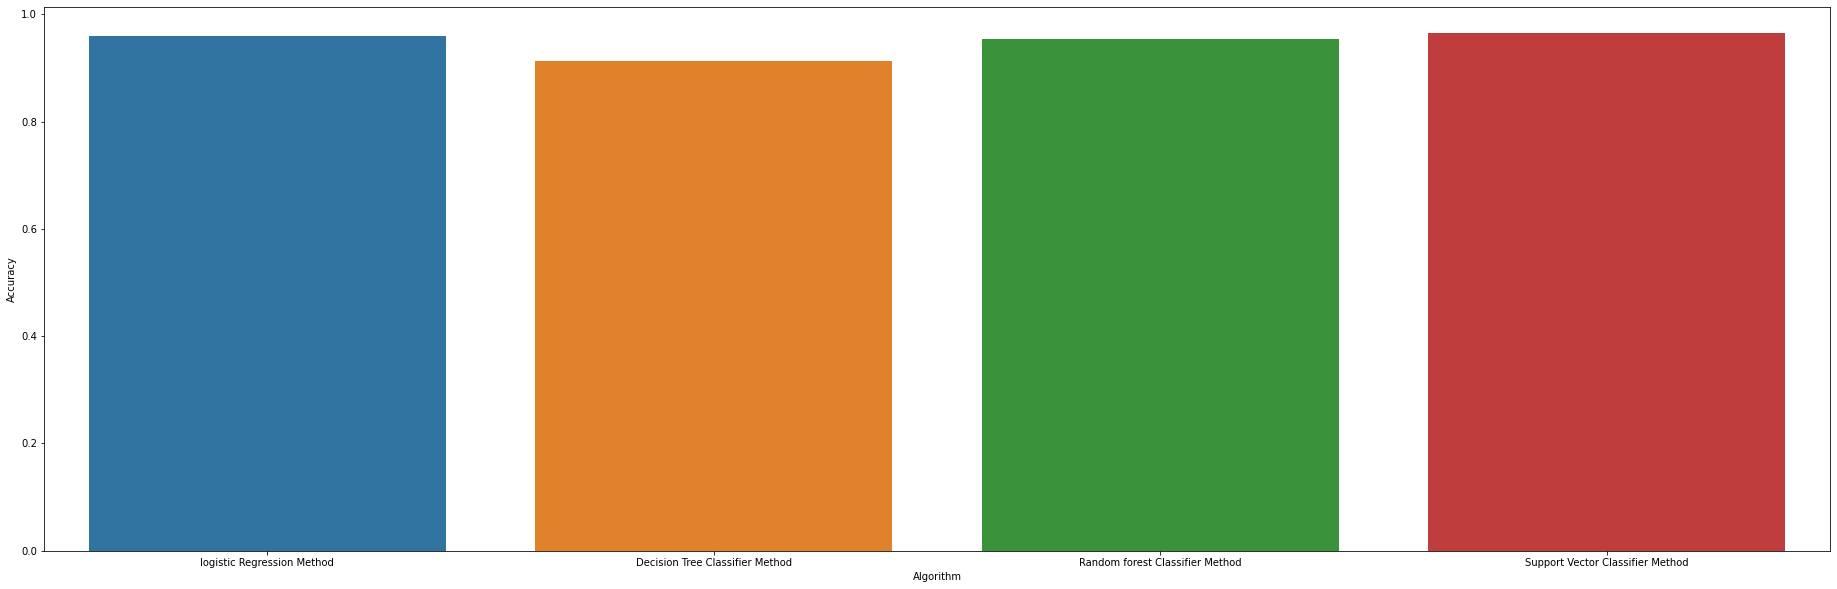

In [73]:
plt.figure(figsize=(32,10))
sns.barplot(x = "Algorithm", y = "Accuracy", data = results)
plt.show()

In [74]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
